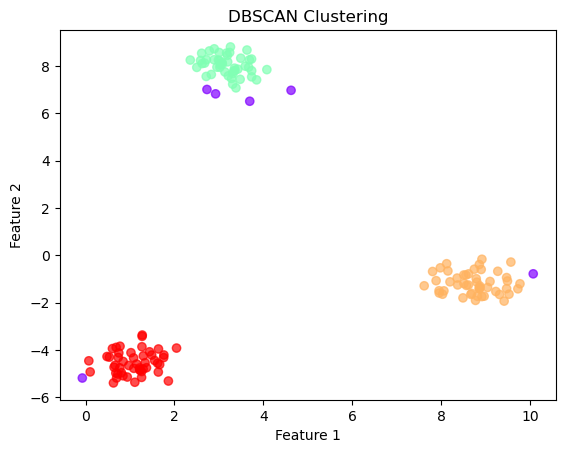

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
from matplotlib import pyplot as plt

# Generate synthetic data with three cluster centers and 150 samples
data, _ = make_blobs(n_samples=150, centers=3, n_features=2, cluster_std=0.50)

# Define the distance function
def calculate_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Define the region query function to return indices
def region_query(D, P, eps):
    neighbors = []
    for idx, point in enumerate(D):
        if calculate_distance(point, P) < eps:
            neighbors.append(idx)
    return neighbors

# Define the function to grow a cluster
def grow_cluster(D, labels, P_idx, NeighborPts_idx, C, eps, MinPts):
    labels[P_idx] = C
    i = 0
    while i < len(NeighborPts_idx):
        point_idx = NeighborPts_idx[i]
        if labels[point_idx] == 0:
            labels[point_idx] = C
            PnNeighborPts_indices = region_query(D, D[point_idx], eps)
            if len(PnNeighborPts_indices) >= MinPts:
                NeighborPts_idx += [idx for idx in PnNeighborPts_indices if labels[idx] == 0]
        i += 1

# Implementing the DBSCAN algorithm
def DBSCAN(D, eps, MinPts):
    labels = [0]*len(D)
    C = 0
    for P_idx in range(len(D)):
        if labels[P_idx] != 0:
            continue
        NeighborPts_idx = region_query(D, D[P_idx], eps)
        if len(NeighborPts_idx) < MinPts:
            labels[P_idx] = -1
        else:
            C += 1
            grow_cluster(D, labels, P_idx, NeighborPts_idx, C, eps, MinPts)
    return labels

# Apply DBSCAN to the dataset
eps = 0.5
MinPts = 4
labels = DBSCAN(data, eps, MinPts)

# Visualizing the clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

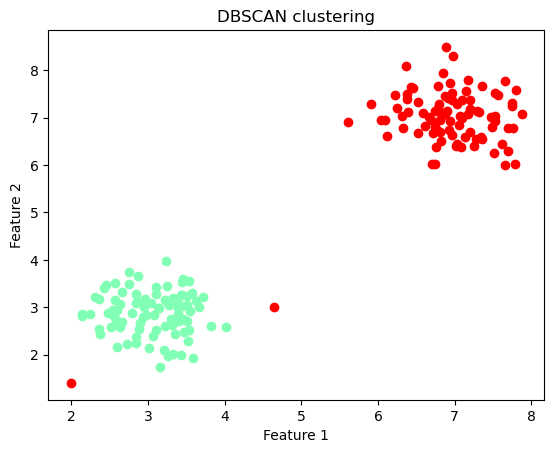

In [2]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Define the distance function
def calculate_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Region Query to find neighbors within eps
def region_query(D, P, eps):
    neighbors = []
    for i in range(D.shape[0]):
        if calculate_distance(D[i], P) < eps:
            neighbors.append(i)
    return neighbors

# Grow cluster by checking eps neighbors and including those that meet MinPts condition
def grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts):
    # TODO: Add code that labels the point P as part of cluster C.
    labels[P] = C
    i = 0
    while i < len(NeighborPts):
        Pn = NeighborPts[i]
        if labels[Pn] == 0 or labels[Pn] == -1:
            labels[Pn] = C
            PnNeighborPts = region_query(D, D[Pn], eps)
            if len(PnNeighborPts) >= MinPts:
                NeighborPts += [p for p in PnNeighborPts if labels[p] == 0]
        i += 1

# Implementing DBSCAN
def DBSCAN(D, eps, MinPts):
    labels = [0]*len(D)
    C = 0
    for P_idx in range(len(D)):
        if labels[P_idx] != 0:
            continue
        NeighborPts_idx = region_query(D, D[P_idx], eps)
        if len(NeighborPts_idx) < MinPts:
            labels[P_idx] = -1
        else:
            C += 1
            grow_cluster(D, labels, P_idx, NeighborPts_idx, C, eps, MinPts)
    return labels

# Generate synthetic data 
data, _ = make_blobs(n_samples=180, centers=[(3, 3), (7, 7)], n_features=2, cluster_std=0.5)

# Apply DBSCAN
labels = DBSCAN(D=data, eps=0.5, MinPts=5)

# Plot results
colors = plt.cm.rainbow(np.linspace(0, 1, len(np.unique(labels))))

for point, cluster_id in zip(data, labels):
    plt.plot(point[0], point[1], 'o', color=colors[int(cluster_id % len(colors))])

plt.title('DBSCAN clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

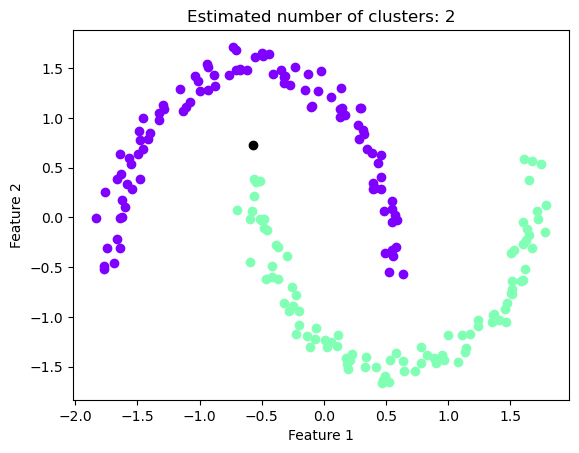

In [1]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Generate a moon-shaped dataset and standardize features
X, y = make_moons(n_samples=200, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X)

# Implement DBSCAN
db = DBSCAN(eps=0.3, min_samples=5).fit(X)

# Extract labels
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Plotting the clusters
colors = plt.cm.rainbow(np.linspace(0, 1, len(set(labels))))

for i in range(len(X)):
    if labels[i] == -1:
        plt.plot(X[i][0], X[i][1], 'o', markerfacecolor='k', markeredgecolor='k')
    else:
        plt.plot(X[i][0], X[i][1], 'o', markerfacecolor=colors[labels[i]], markeredgecolor=colors[labels[i]])

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

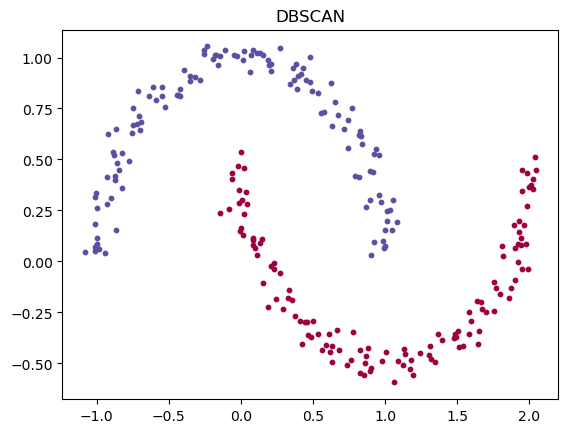

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Generating our dataset with make_moons
X, _ = make_moons(n_samples=250, noise=0.05, random_state=42)

# Creating the DBSCAN model
db = DBSCAN(eps=0.2, min_samples=10)
db.fit(X)
labels = db.labels_

# Plotting
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for unique_label, color in zip(unique_labels, colors):
    if unique_label == -1:
        color = 'k'

    class_member_mask = (labels == unique_label)
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], color=color, s=10)
    
plt.title('DBSCAN')
plt.show()

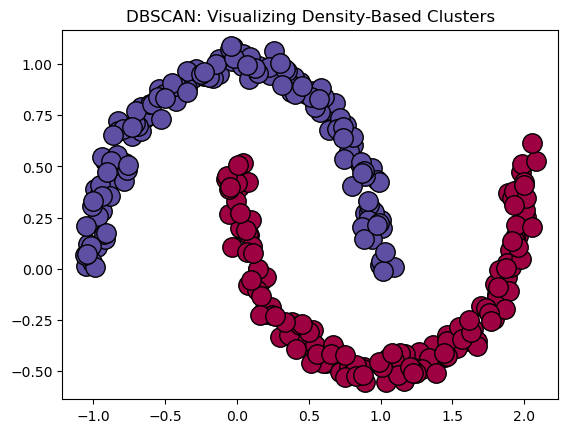

In [2]:
# Importing Python libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Creating a toy dataset with different parameters
X, y = make_moons(n_samples=300, noise=0.05)

# TODO: Initialize the DBSCAN model with eps=0.3 and min_samples=5
db = DBSCAN(eps = 0.3,min_samples=5)

# TODO: Fit the DBSCAN model to our data X and fetch the cluster labels
db.fit(X)
labels = db.labels_
# Identify core samples
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Plotting
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):

    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN: Visualizing Density-Based Clusters')
plt.show()

In [3]:
from sklearn.cluster import DBSCAN
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

# Generating synthetic clusters with adjusted centers
data, _ = make_blobs(n_samples=200, centers=[(4, 4), (9, 9)], n_features=2, cluster_std=0.6)

# Parameters for DBSCAN
epsilon = 0.8
min_samples = 10

# Running DBSCAN algorithm
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan.fit(data)
labels = dbscan.labels_

# Visualizing clusters
plt.figure(figsize=(6, 6))
unique_labels = np.unique(dbscan.labels_)

# TODO: Use the Matplotlib library to create a color map, then loop through the data and plot clusters and noise
# Make sure each cluster has a unique color and noise points are black
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):

    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

ValueError: operands could not be broadcast together with shapes (200,) (300,) 

<Figure size 600x600 with 0 Axes>